The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

<img src = "./Desktop/DATA ANALYSIS PROJECT/Project/workspace (5)/workspace/Nobel_Prize.png">

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

<h1>Nobel Prize</h1>
<p>In this analysis, we are going to analyse the nobel prize data. Our outcomes are : 
<ol>
    <li>To extract the top values from sex and birth_country</li>
    <li>Find the decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories.</li>
    <li>Visualize it</li>
</ol>
</p>
<p class = "Intro"> <h2>Step of the Analysis</h2></p>
<ol>
    <li>Import the important and necessary module and library for this Case Study</li>
    <li>Import the data into data frame</li>
    <li>Analyse the data
    <ul>
        <li>Check the shape of the Data</li>
        <li>All the columns of the Data</li>
        <li>Describe and Summarize the Data</li>
        <li>All info about the Data</li>
        <li>Data types of each columns</li>
        <li>Takea subset for movies in the data and action movies.</li>
    </ul>
    </li>
    <li>  <h3>Data Cleaning and Processing</h3>
        <p>In this section, we perform the following steps:
        <ul>
        <li>Check for missing value in the Data</li>
        <li>Drop all missing value </li>
        <li>Convert the columns to the corect Data types</li>
        <li>Count the value in each column</li>
        <li>Group the Data into category if necessary
        </li>
        <li>Number of unique Data in columns</li>
            <li>Sort the Data if needed</li>
        <li>Convert all columns to the specific data types, we can use <i> <strong>dtypes</strong></i> to find the data type and <i> <strong>astype()</strong></i></p>
    </li>
    <li><h3>Exploratory Data</h3>
    <ul>
        <h4>Visualize the Data.</h4>
    </ul>
    </li>
</ol>


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import scipy.stats as ss

In [42]:
nobel_df = pd.read_csv("./Desktop/DATA ANALYSIS PROJECT/Project/workspace (5)/workspace/data/nobel.csv")

In [35]:
nobel_df

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winners,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",...,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,True,2020,False
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,...,Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN,False,2020,False
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,...,Male,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,False
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,True


United States of America
Male
2000
{2020: 'Literature'}


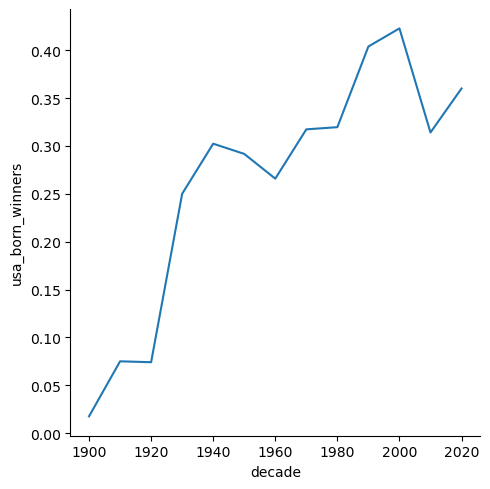

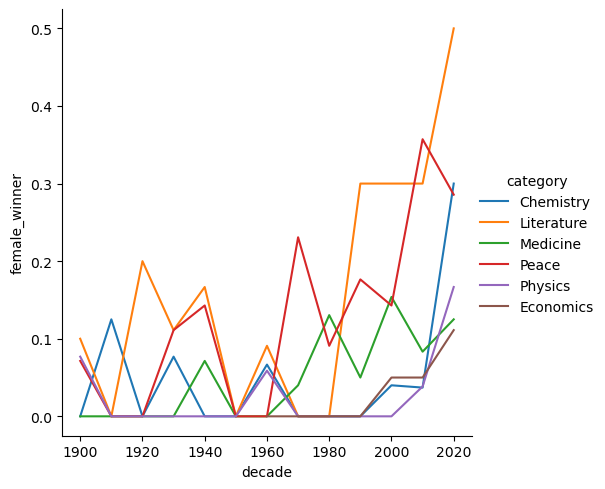

In [20]:
#Let's extract the top values from sex and birth_country
top_gender = nobel_df['sex'].value_counts().idxmax()
top_country = nobel_df['birth_country'].value_counts().idxmax()
print(top_country)
print(top_gender)
#Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
nobel_df['usa_born_winners'] = nobel_df['birth_country'] == 'United States of America'
nobel_df['decade'] = np.floor(nobel_df['year'] / 10) * 10
nobel_df['decade'] = nobel_df['decade'].astype(int)
df_new = nobel_df.groupby('decade', as_index=False)['usa_born_winners'].mean()
max_decade_usa = df_new[df_new['usa_born_winners'] == df_new['usa_born_winners'].max()]['decade'].values[0]
print(max_decade_usa)
sns.relplot(x='decade', y='usa_born_winners', data=df_new, kind='line');

nobel_df['female_winner'] = nobel_df['sex'] == 'Female'
df_female = nobel_df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female_dict = {
    df_female[df_female['female_winner'] == df_female['female_winner'].max()]['decade'].values[0]: df_female[df_female['female_winner'] == df_female['female_winner'].max()]['category'].values[0]
}
print(max_female_dict)
sns.relplot(x='decade', y='female_winner', data=df_female, hue='category', kind='line');


In [23]:
new_df = nobel_df[nobel_df['female_winner']]
min_row = new_df[new_df['year'] == new_df['year'].min()]
first_woman_name, first_woman_category = min_row['full_name'].values[0], min_row['category'].values[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [30]:
repeat_winners = pd.DataFrame(nobel_df['full_name'].value_counts())

repeat_list = nobel_df['full_name'].value_counts()[ nobel_df['full_name'].value_counts()>1].index.tolist()

In [28]:
repeat_winners

,count
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Linus Carl Pauling,2
John Bardeen,2
Frederick Sanger,2
"Marie Curie, née Sklodowska",2
...,...
Karl Ziegler,1
Giulio Natta,1
Giorgos Seferis,1


In [32]:
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

<h2>
    Author : 
     <h6>WEDSON PETIT HOMME </h6>
    <br>
    <h4> Contact :</h4>
    <li>Email : wedsonpetithomme0@gmail.com</li>
    <li> <a href = "https://www.linkedin.com/"> Linkedin :</a><a href = "https://www.linkedin.com/in/wedson-petithomme-947571239/">wedson-petit-homme-947571239 </a></li>
    <li><a href = "https://github.com/ALYProdz">GitHub :</a><a href = "https://github.com/ALYProdz">Wedson (ALYProdz) </a> </li>
    <li><a href = "https://x.com/"> X(Twitter) :</a> @WedsonPh97</li>
    <li><a href = https://www.datacamp.com/portfolio/wedsonpetithomme> Datacamp :</a><a href = "https://www.datacamp.com/portfolio/wedsonpetithomme"> WEDSON PETIT HOMME</a></li>
</h2>
